## 1.Preapre Data 

In [1]:
import pandas as pd
import numpy as np

# Reload the standardized dataset
data_path = '../Database/standardized_diabetes_data.csv'
standardized_data = pd.read_csv(data_path)

# Split the dataset into features and target variable
X = standardized_data.drop(columns='Outcome')
y = standardized_data['Outcome']

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the training and testing sets to confirm the split
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


/opt/anaconda/anaconda3/envs/torch-gpu/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda/anaconda3/envs/torch-gpu/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


((614, 8), (154, 8), (614,), (154,))

## 2. TEST Model

In [2]:
import sys
import os
__file__ = %pwd
sys.path.append(os.path.dirname(__file__))
from CODE.Model.MLP import MLP_fix
from CODE.Model.Runner import Trainer

In [3]:
import torch

trainer = Trainer(
    
    MLP_fix,
    (X_train, X_test, y_train, y_test),

    learning_rate=0.001,
    batch_size=32,
    weight_decay=0.0,
    
    model_p={
        'network_structure': (8, 9),
        'act_fun': torch.relu,
        'dropout_rate': 0.1, 
    })

result = trainer.run(num_epochs=200, evaluation_interval=10)

Epoch [10/200], Loss: 0.5282, Training Accuracy: 74.92%, Testing Accuracy: 69.48%
Epoch [20/200], Loss: 0.4578, Training Accuracy: 76.71%, Testing Accuracy: 70.13%
Epoch [30/200], Loss: 0.4583, Training Accuracy: 78.66%, Testing Accuracy: 73.38%
Epoch [40/200], Loss: 0.4498, Training Accuracy: 79.32%, Testing Accuracy: 70.13%
Epoch [50/200], Loss: 0.4468, Training Accuracy: 78.99%, Testing Accuracy: 71.43%
Epoch [60/200], Loss: 0.4472, Training Accuracy: 77.69%, Testing Accuracy: 71.43%
Epoch [70/200], Loss: 0.4340, Training Accuracy: 79.97%, Testing Accuracy: 70.78%
Epoch [80/200], Loss: 0.4315, Training Accuracy: 78.50%, Testing Accuracy: 70.13%
Epoch [90/200], Loss: 0.4254, Training Accuracy: 79.48%, Testing Accuracy: 72.08%
Epoch [100/200], Loss: 0.4358, Training Accuracy: 79.32%, Testing Accuracy: 71.43%
Epoch [110/200], Loss: 0.4356, Training Accuracy: 77.69%, Testing Accuracy: 72.08%
Epoch [120/200], Loss: 0.4359, Training Accuracy: 78.34%, Testing Accuracy: 73.38%
Epoch [130/20

In [4]:
result

(0.4128641092039475, 0.8094462540716613, 0.7272727272727273)

## 3. Influence of the number of layers and neurons

In [14]:
model_structure_dict = {
    (2,):[],
    (4,):[],
    (8,):[],
    (16,):[],
    (32,):[],
    (64,):[],
}

In [15]:
import time

In [16]:
time.sleep(1)

for key, values in model_structure_dict.items():
    start_time = time.time()
    trainer = Trainer(
        MLP_fix,
        (X_train, X_test, y_train, y_test),

        learning_rate=0.001,
        batch_size=32,
        weight_decay=0.0,
        
        model_p={
            'network_structure': key,
            'act_fun': torch.relu,
            'dropout_rate': 0.0, 
        })
    values = list(trainer.run(
        num_epochs=200,silent=True)) + [time.time()-start_time]
    print(f'Net struct: {key} with result:')
    print(f'\ttraining_loss:{values[0]* 100:.2f}%,\ttraining_acc:{values[1]* 100:.2f}%,\ttesting_acc:{values[2]* 100:.2f}%,\tduration:{values[3]:.2f}sec')

Net struct: (2,) with result:
	training_loss:44.52%,	training_acc:78.83%,	testing_acc:69.48%,	duration:4.09sec
Net struct: (4,) with result:
	training_loss:41.49%,	training_acc:79.97%,	testing_acc:75.97%,	duration:3.93sec
Net struct: (8,) with result:
	training_loss:41.69%,	training_acc:80.46%,	testing_acc:71.43%,	duration:3.96sec
Net struct: (16,) with result:
	training_loss:39.98%,	training_acc:80.94%,	testing_acc:76.62%,	duration:3.96sec
Net struct: (32,) with result:
	training_loss:36.47%,	training_acc:83.06%,	testing_acc:74.68%,	duration:3.97sec
Net struct: (64,) with result:
	training_loss:34.02%,	training_acc:84.53%,	testing_acc:74.03%,	duration:4.16sec


In [17]:
model_structure_dict2 = {
    (16,16,):[],
    (16,32,16):[],
    (16,32,32,16):[],
    (16,32,64,32,16,):[],
    (16,32,64,64,32,16,):[],
    (16,32,64,128,64,32,16,):[],
}

time.sleep(1)

for key, values in model_structure_dict2.items():
    start_time = time.time()
    trainer = Trainer(
        MLP_fix,
        (X_train, X_test, y_train, y_test),

        learning_rate=0.001,
        batch_size=32,
        weight_decay=0.0,
        
        model_p={
            'network_structure': key,
            'act_fun': torch.relu,
            'dropout_rate': 0.0, 
        })
    values = list(trainer.run(
        num_epochs=200,silent=True)) + [time.time()-start_time]
    print(f'Net struct: {key} with result:')
    print(f'\ttraining_loss:{values[0]* 100:.2f}%,\ttraining_acc:{values[1]* 100:.2f}%,\ttesting_acc:{values[2]* 100:.2f}%,\tduration:{values[3]:.2f}sec')

Net struct: (16, 16) with result:
	training_loss:32.91%,	training_acc:84.69%,	testing_acc:72.73%,	duration:4.88sec
Net struct: (16, 32, 16) with result:
	training_loss:18.42%,	training_acc:93.32%,	testing_acc:74.03%,	duration:5.53sec
Net struct: (16, 32, 32, 16) with result:
	training_loss:6.29%,	training_acc:98.37%,	testing_acc:70.13%,	duration:6.75sec
Net struct: (16, 32, 64, 32, 16) with result:
	training_loss:0.62%,	training_acc:100.00%,	testing_acc:66.88%,	duration:7.49sec
Net struct: (16, 32, 64, 64, 32, 16) with result:
	training_loss:0.13%,	training_acc:100.00%,	testing_acc:67.53%,	duration:9.04sec
Net struct: (16, 32, 64, 128, 64, 32, 16) with result:
	training_loss:0.03%,	training_acc:100.00%,	testing_acc:68.83%,	duration:10.52sec


## 4. Influence of learning rate

In [41]:
learn_rate_dict = {1e-5 * 4**i:[] for i in range(0, 7)}

for learn_rate, values in learn_rate_dict.items():
    trainer = Trainer(
        MLP_fix,
        (X_train, X_test, y_train, y_test),

        learning_rate=learn_rate,
        batch_size=32,
        weight_decay=0.0,
        
        model_p={
            'network_structure': (16,32,16),
            'act_fun': torch.relu,
            'dropout_rate': 0.0, 
        })
    trainer.run(num_epochs=1000,silent=True,evaluation_interval=1)
    learn_rate_dict[learn_rate] = [
        trainer.training_loss,
        trainer.training_accuracy,
        trainer.testing_accuracy]


In [32]:
learn_rate_dict

{1e-06: [[0.6843073614645471,
   0.6839494874112381,
   0.6835856352256253,
   0.6832248238476557,
   0.6828638585071999,
   0.6824942879645755,
   0.6821239864399068,
   0.6817590437028618,
   0.6813894947111024,
   0.6810207034943546,
   0.6806458458061715,
   0.6802669402442459,
   0.6798858240683615,
   0.6795031082746649,
   0.6791202066775642,
   0.6787375873773804,
   0.6783541237104211,
   0.6779608841051108,
   0.6775773247212463,
   0.6771877309010161,
   0.6767908051270227,
   0.676394798274149,
   0.6759949514842577,
   0.6755939192026368,
   0.6751908013409046,
   0.6747869752129049,
   0.6743860949522509,
   0.6739902179870233,
   0.67358883972665,
   0.6731851359143708,
   0.6727712152446909,
   0.6723721751560994,
   0.6719654431560529,
   0.6715467861498606,
   0.6711333065933824,
   0.6707306119828736,
   0.6703201132410901,
   0.6699087233419139,
   0.6695002451393426,
   0.669084918809636,
   0.6686684186373161,
   0.6682397820273905,
   0.6678162273444259,
   0.667

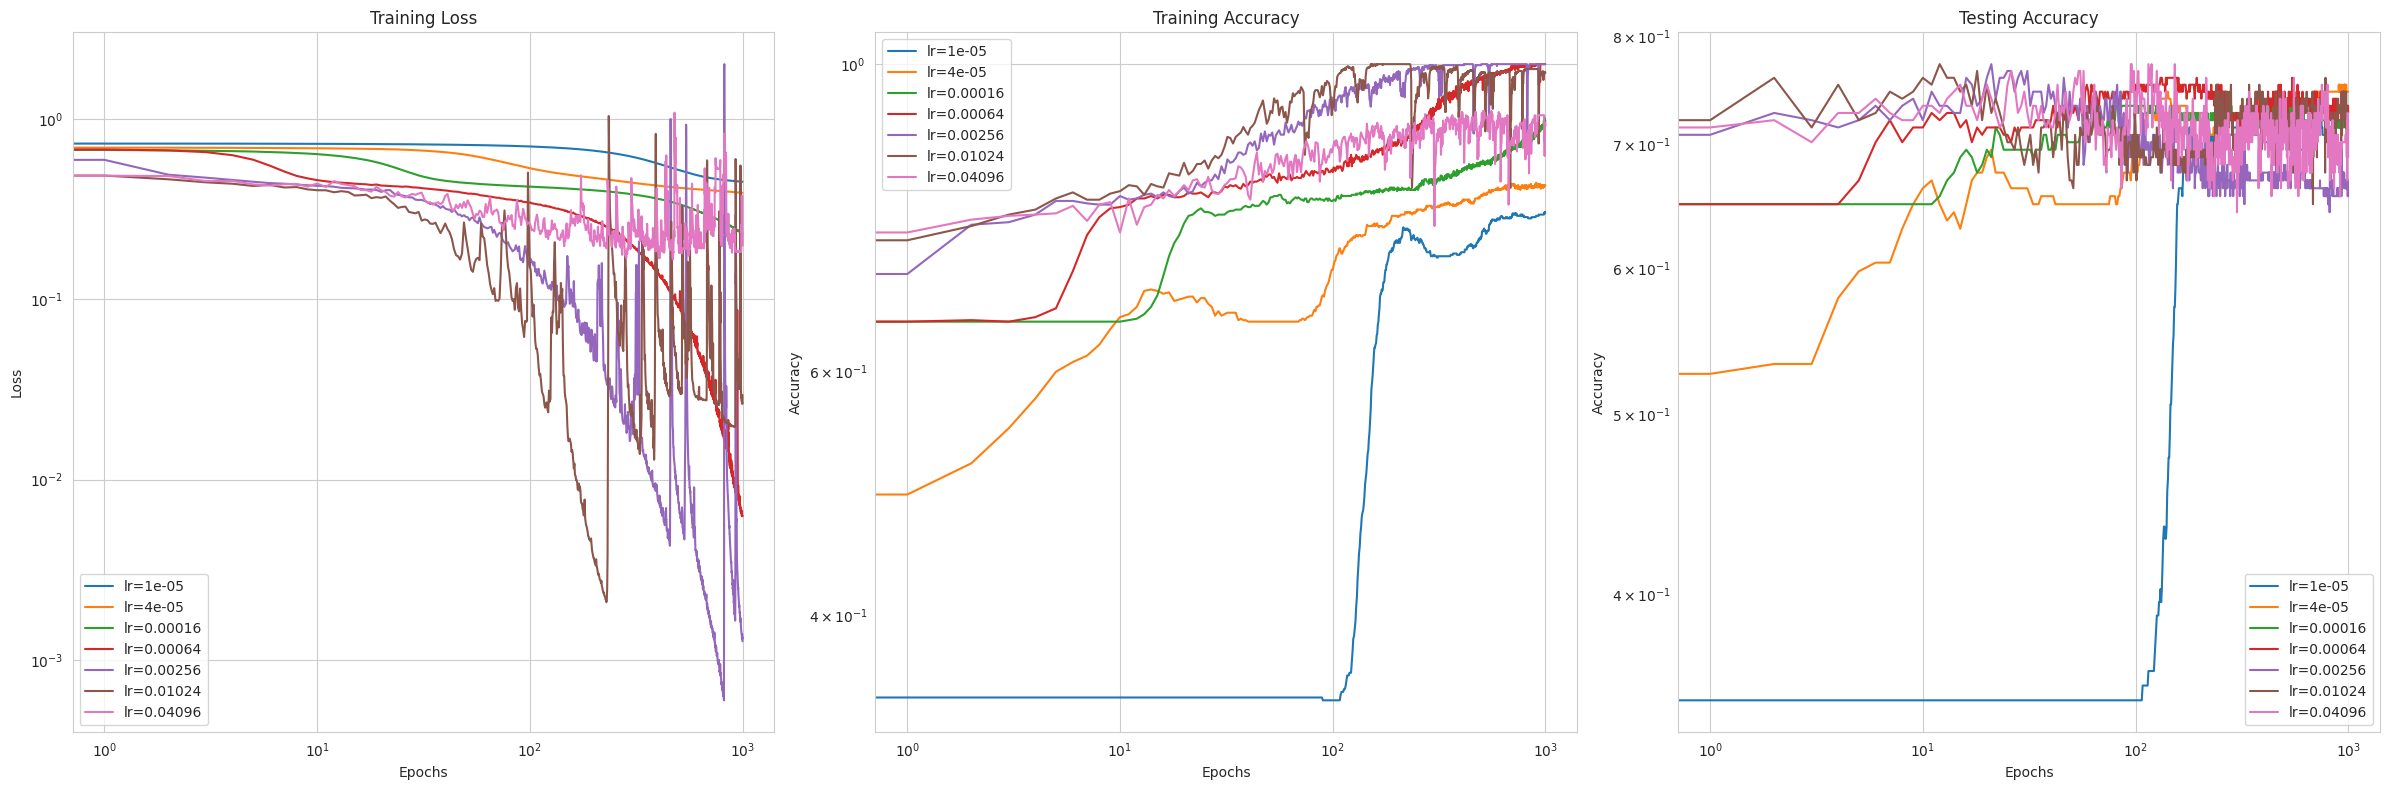

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
epochs = np.arange(0, 1001, 1) 

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

def custom_formatter(x, pos):
    exponent = np.floor(np.log10(abs(x)))
    coeff = x / 10**exponent
    return f"${coeff:.2f}e^{{{int(exponent)}}}$"

formatter = FuncFormatter(custom_formatter)

for learn_rate, values in learn_rate_dict.items():
    axs[0].plot(values[0], label=f'lr={learn_rate}')
    axs[1].plot(values[1], label=f'lr={learn_rate}')
    axs[2].plot(values[2], label=f'lr={learn_rate}')

# Setting labels and titles
axs[0].set_title('Training Loss')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlabel('Epochs')
#axs[0].yaxis.set_major_formatter(formatter)

axs[1].set_title('Training Accuracy')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel('Epochs')

axs[2].set_title('Testing Accuracy')
axs[2].set_ylabel('Accuracy')
axs[2].set_xlabel('Epochs')
axs[2].legend()
axs[2].set_yscale('log')
axs[2].set_xscale('log')
axs[2].set_xlabel('Epochs')

plt.tight_layout()
plt.savefig('learning_rate.png', dpi=1200, bbox_inches='tight')
plt.show()

## 5. Influence of the dropout rate

In [48]:
drop_rate_dict = {i:[] for i in [0, 0.001, 0.002, 0.004, 0.1, 0.2, 0.4]}

for drop_rate, values in drop_rate_dict.items():
    trainer = Trainer(
        MLP_fix,
        (X_train, X_test, y_train, y_test),

        learning_rate=0.001,
        batch_size=32,
        weight_decay=0.0,
        
        model_p={
            'network_structure': (16,32,16),
            'act_fun': torch.relu,
            'dropout_rate': drop_rate, 
        })
    trainer.run(num_epochs=1000,silent=True,evaluation_interval=1)
    drop_rate_dict[drop_rate] = [
        trainer.training_loss,
        trainer.training_accuracy,
        trainer.testing_accuracy]


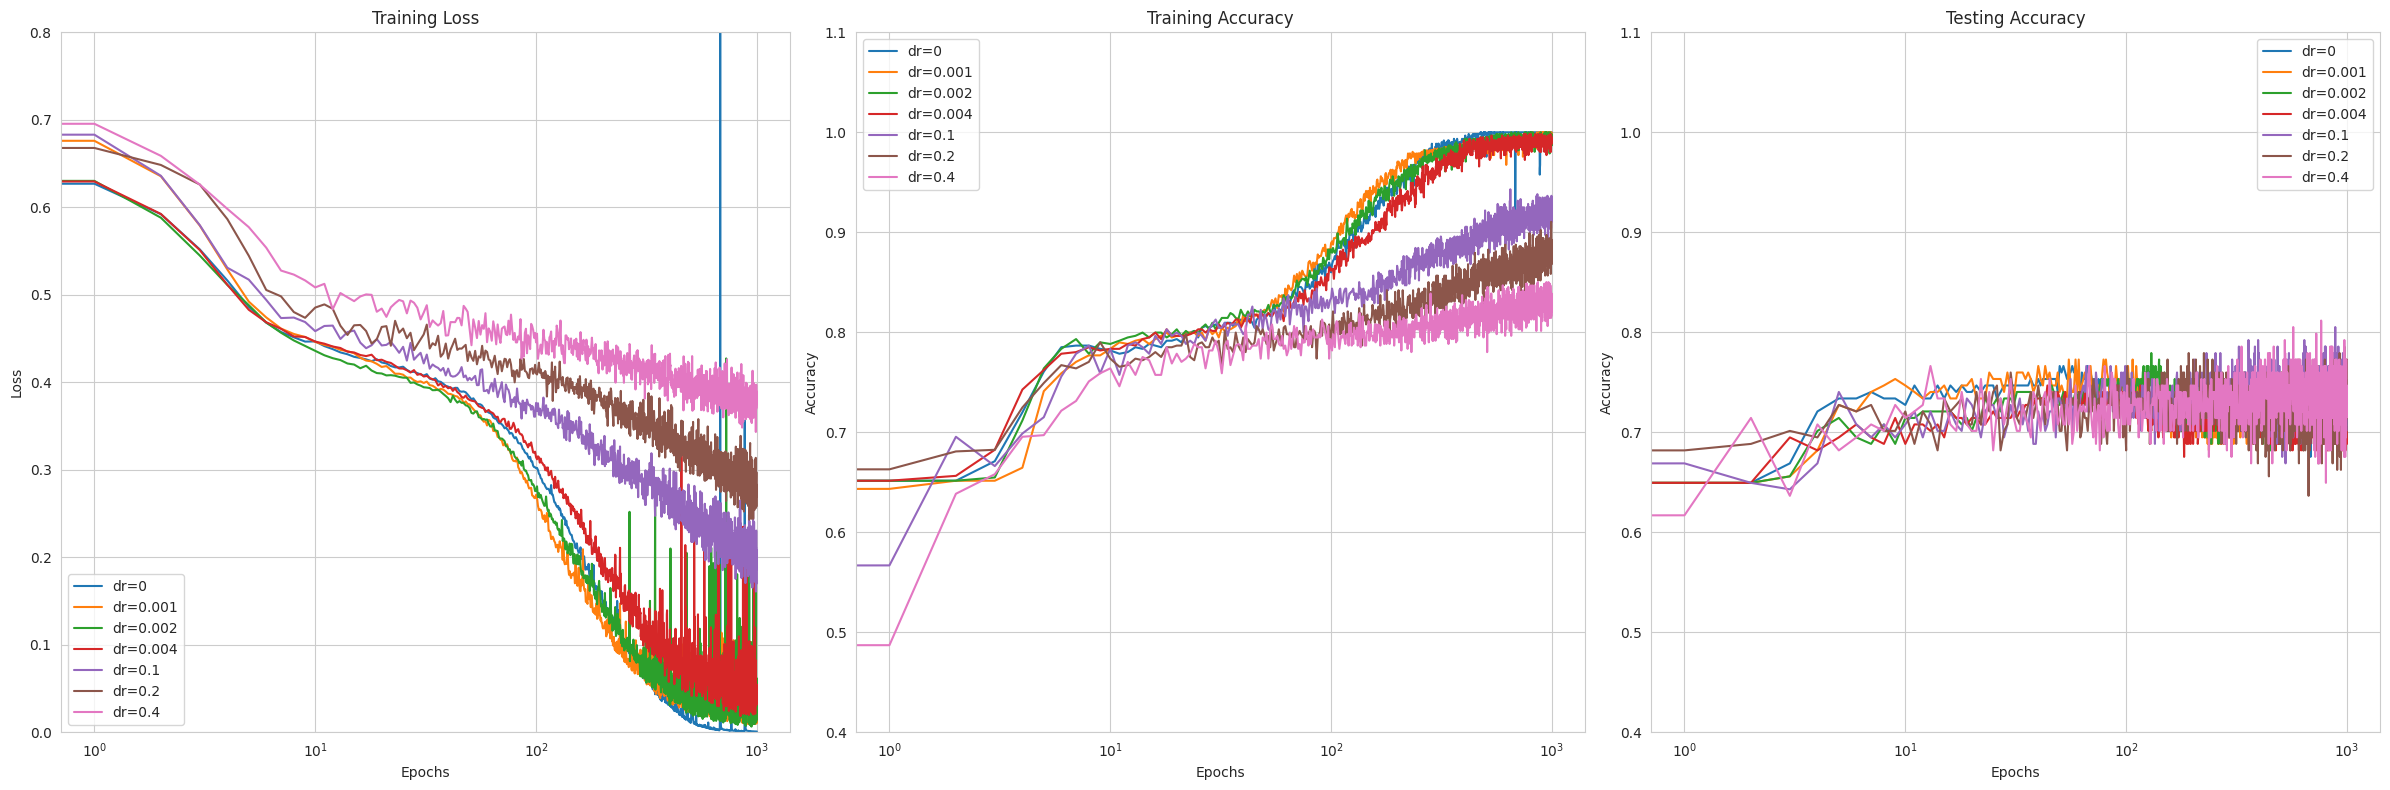

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
epochs = np.arange(0, 1001, 1) 

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

for learn_rate, values in drop_rate_dict.items():
    axs[0].plot(values[0], label=f'dr={learn_rate}')
    axs[1].plot(values[1], label=f'dr={learn_rate}')
    axs[2].plot(values[2], label=f'dr={learn_rate}')

# Setting labels and titles
axs[0].set_title('Training Loss')
axs[0].set_ylabel('Loss')
axs[0].legend()
# axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_xlabel('Epochs')
axs[0].set_ylim([0, 0.8])  

axs[1].set_title('Training Accuracy')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
# axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel('Epochs')
axs[1].set_ylim([0.4, 1.1]) 

axs[2].set_title('Testing Accuracy')
axs[2].set_ylabel('Accuracy')
axs[2].set_xlabel('Epochs')
axs[2].legend()
# axs[2].set_yscale('log')
axs[2].set_xscale('log')
axs[2].set_xlabel('Epochs')
axs[2].set_ylim([0.4, 1.1]) 

plt.tight_layout()
plt.savefig('drop_rate.png', dpi=1200, bbox_inches='tight')
plt.show()
